In [2]:
import kagglehub

dataset1_path = kagglehub.dataset_download("asdasdasasdas/garbage-classification")
dataset2_path = kagglehub.dataset_download("mostafaabla/garbage-classification")
dataset3_path = kagglehub.dataset_download("sumn2u/garbage-classification-v2")

print("Path to dataset files:", dataset1_path)
print("Path to dataset files:", dataset2_path)
print("Path to dataset files:", dataset3_path)

c:\Users\suzun\Documents\Spring2025\ML\Project\CNN+SVM\pytorch310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 82.0M/82.0M [00:01<00:00, 56.1MB/s]

Extracting files...


100%|██████████| 239M/239M [00:04<00:00, 61.8MB/s] 

Extracting files...


100%|██████████| 744M/744M [00:12<00:00, 64.3MB/s] 

Extracting files...


Path to dataset files: C:\Users\suzun\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2
Path to dataset files: C:\Users\suzun\.cache\kagglehub\datasets\mostafaabla\garbage-classification\versions\1
Path to dataset files: C:\Users\suzun\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8


In [ ]:
import os
import cv2 as cv
dataset_paths = [dataset1_path, dataset2_path, dataset3_path]

def path_exists(dataset_paths):
  for path in dataset_paths:
    print(path)
    if os.path.exists(path):
        print("Dataset directory exists!")
        print("Files in dataset:", os.listdir(path))
    else:
        print("Dataset directory not found!")
    print()

path_exists(dataset_paths)

dataset_images_paths = [r'C:\Users\suzun\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2',
                        r'C:\Users\suzun\.cache\kagglehub\datasets\mostafaabla\garbage-classification\versions\1',
                        r'C:\Users\suzun\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8']

C:\Users\suzun\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2
Dataset directory exists!
Files in dataset: ['Garbage classification', 'one-indexed-files-notrash_test.txt', 'one-indexed-files-notrash_train.txt', 'one-indexed-files-notrash_val.txt', 'one-indexed-files.txt', 'zero-indexed-files.txt']

C:\Users\suzun\.cache\kagglehub\datasets\mostafaabla\garbage-classification\versions\1
Dataset directory exists!
Files in dataset: ['garbage_classification']

C:\Users\suzun\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8
Dataset directory exists!
Files in dataset: ['garbage-dataset']



In [9]:
dataset_images_paths = [r'C:\Users\suzun\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2\Garbage classification\Garbage classification',
                        r'C:\Users\suzun\.cache\kagglehub\datasets\mostafaabla\garbage-classification\versions\1\garbage_classification',
                        r'C:\Users\suzun\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8\garbage-dataset']
img_size = (256, 256)

def resize_image(datasets):
  resized_dataset_paths = []
  for dataset in datasets:
    # create dir for resized datasets
    resized_dataset = f"{dataset}-resized"
    os.makedirs(resized_dataset, exist_ok=True)
    resized_dataset_paths.append(resized_dataset)

    # iterate through the directories of each dataset
    for folder in os.listdir(dataset):
      # path for the curr folder
      folder_path = os.path.join(dataset, folder)
      # create new folder for resized images (keep in same category)
      resized_folder = f"{dataset}-resized/{folder}"
      os.makedirs(resized_folder, exist_ok=True)

      for img_file in os.listdir(folder_path):
        # path for curr img
        img_path = os.path.join(folder_path, img_file)
        img = cv.imread(img_path)

        if img is None:
          print(f"{img_file} could not be read.")
          continue

        resized_img = cv.resize(img, img_size, interpolation=cv.INTER_AREA)
        output_path = os.path.join(resized_folder, img_file)
        cv.imwrite(output_path, resized_img)

  return resized_dataset_paths

resized_dataset_paths = resize_image(dataset_images_paths)

In [10]:
def denoise_images(datasets):
    denoised_dataset_paths = []
    for dataset in datasets:
        # Output for denoised datasets
        denoised_dataset = f"{dataset}-denoised"
        os.makedirs(denoised_dataset, exist_ok=True) # added exist_ok=True -suzuna
        denoised_dataset_paths.append(denoised_dataset)

        # Iterate through the directories of each dataset
        for folder in os.listdir(dataset):

            folder_path = os.path.join(dataset, folder)
            denoised_folder = f"{dataset}-denoised/{folder}"
            os.makedirs(denoised_folder, exist_ok=True)

            for img_file in os.listdir(folder_path):
                # Path for current image
                img_path = os.path.join(folder_path, img_file)
                img = cv.imread(img_path)

                if img is None:
                    print(f"{img_file} could not be read.")
                    continue

                # Apply Gaussian blur
                blurred = cv.GaussianBlur(img, (3, 3), 0)

                # Apply bilateral denoising
                denoised_img = cv.bilateralFilter(blurred, d=9, sigmaColor=75, sigmaSpace=75)

                # Save denoised image to the corresponding output folder
                output_path = os.path.join(denoised_folder, img_file)
                cv.imwrite(output_path, denoised_img)

        print("Finished denoising " + str(folder_path))

    return denoised_dataset_paths

denoised_dataset_paths = denoise_images(resized_dataset_paths)
print(f"Denoising completed" + str(denoised_dataset_paths))

Finished denoising C:\Users\suzun\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2\Garbage classification\Garbage classification-resized\trash
Finished denoising C:\Users\suzun\.cache\kagglehub\datasets\mostafaabla\garbage-classification\versions\1\garbage_classification-resized\white-glass
Finished denoising C:\Users\suzun\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8\garbage-dataset-resized\trash
Denoising completed['C:\\Users\\suzun\\.cache\\kagglehub\\datasets\\asdasdasasdas\\garbage-classification\\versions\\2\\Garbage classification\\Garbage classification-resized-denoised', 'C:\\Users\\suzun\\.cache\\kagglehub\\datasets\\mostafaabla\\garbage-classification\\versions\\1\\garbage_classification-resized-denoised', 'C:\\Users\\suzun\\.cache\\kagglehub\\datasets\\sumn2u\\garbage-classification-v2\\versions\\8\\garbage-dataset-resized-denoised']


In [11]:
def normalize_dataset_images(datasets):
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    normalized_dataset_paths = []
    for dataset in datasets:
      if os.path.exists(dataset):
        print(f"Found dataset {dataset}")
      else:
        print(f"Could not find dataset {dataset}")
    for dataset in datasets:
       if os.path.exists(dataset):
              if not os.path.exists(f"{dataset}-normalized"):
                     os.makedirs(f"{dataset}-normalized")
                     normalized_dataset_paths.append(f"{dataset}-normalized")

              for folder in os.listdir(dataset):
                     if not os.path.exists(f"{dataset}-normalized/{folder}"):
                            os.makedirs(f"{dataset}-normalized/{folder}")

                     for img in os.listdir(f"{dataset}/{folder}"):
                            image = cv.imread(f"{dataset}/{folder}/{img}")
                            lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
                            l, a, b = cv.split(lab)
                            l = clahe.apply(l)
                            lab = cv.merge((l, a, b))
                            image = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
                            cv.imwrite(f"{dataset}-normalized/{folder}/{img}", image)
              print(f"Dataset {dataset} normalized")
       else:
              print(f"Dataset {dataset} not found")
              return False
    print(f"Dataset paths: " + str(normalized_dataset_paths))
    return normalized_dataset_paths

# i changed the dataset_images_paths -> denoised_dataset_paths -suzuna
normalized_dataset_paths = normalize_dataset_images(denoised_dataset_paths)

Found dataset C:\Users\suzun\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2\Garbage classification\Garbage classification-resized-denoised
Found dataset C:\Users\suzun\.cache\kagglehub\datasets\mostafaabla\garbage-classification\versions\1\garbage_classification-resized-denoised
Found dataset C:\Users\suzun\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8\garbage-dataset-resized-denoised
Dataset C:\Users\suzun\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2\Garbage classification\Garbage classification-resized-denoised normalized
Dataset C:\Users\suzun\.cache\kagglehub\datasets\mostafaabla\garbage-classification\versions\1\garbage_classification-resized-denoised normalized
Dataset C:\Users\suzun\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8\garbage-dataset-resized-denoised normalized
Dataset paths: ['C:\\Users\\suzun\\.cache\\kagglehub\\datasets\\asdasdasasdas\\garbage-classification\\vers

Dataset1 class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'] 

Dataset2 class names: ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass'] 

Dataset3 class names: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(torch.__version__)
print(torch.version.cuda)

cuda
2.5.1+cu121
12.1


In [6]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("CUDA Device Name:", torch.cuda.get_device_name(0))


CUDA Available: True
CUDA Device Count: 1
CUDA Device Name: NVIDIA GeForce RTX 3060


In [7]:
if torch.cuda.is_available():
    torch.cuda.set_per_process_memory_fraction(0.5)

In [8]:
from collections import defaultdict
import shutil

import os

In [ ]:
# combine all the images with its respective lables

data_set_paths = [r'C:\Users\suzun\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2\Garbage classification\Garbage classification-resized-denoised-normalized', 
                  r'C:\Users\suzun\.cache\kagglehub\datasets\mostafaabla\garbage-classification\versions\1\garbage_classification-resized-denoised-normalized', 
                  r'C:\Users\suzun\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8\garbage-dataset-resized-denoised-normalized']

combined_dataset_path = r'C:\Users\suzun\Documents\Spring2025\ML\Project\CNN+SVM\combined_garbage_dataset'

if os.path.exists(combined_dataset_path):
    shutil.rmtree(combined_dataset_path)
    print(f"Removed existing directory: {combined_dataset_path}")

# create combined class folders
os.makedirs(combined_dataset_path, exist_ok=False)
print(f"Created directory: {combined_dataset_path}")

# file count per class to avoid overwriting
file_counters = defaultdict(int)

glass_names = ["white-glass", "green-glass", "brown-glass", "glass"]

for dataset_path in data_set_paths:
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name) # path to the curr class folder
        if not os.path.isdir(class_path):
            continue

        # to combine glass classes into one
        if class_name in glass_names:
            combined_class_name = "glass"
        else:
            combined_class_name = class_name

        # create folder in combined_dataset_path with the class_name
        combined_class_path = os.path.join(combined_dataset_path, combined_class_name)
        os.makedirs(combined_class_path, exist_ok=True)


        # Copy images
        for filename in os.listdir(class_path):
            src_file = os.path.join(class_path, filename)

            # Avoid name conflicts by renaming
            new_filename = f"{file_counters[class_name]}_{filename}"
            dst_file = os.path.join(combined_class_path, new_filename)

            shutil.copy2(src_file, dst_file)
            file_counters[class_name] += 1

print("all datasets combined successfully.")


Removed existing directory: C:\Users\suzun\Documents\Spring2025\ML\Project\CNN+SVM\combined_garbage_dataset
Created directory: C:\Users\suzun\Documents\Spring2025\ML\Project\CNN+SVM\combined_garbage_dataset
all datasets combined successfully.


In [ ]:
# split the dataset into train, test, and validation sets
combined_dataset_path = r'C:\Users\suzun\Documents\Spring2025\ML\Project\CNN+SVM\combined_garbage_dataset'

# still need to normalize the images - CLAHE only enhances the contrast
transform = transforms.Compose([transforms.ToTensor()])

# finding custom mean and std per channel (color component - rgb) for Normalize()
# computing the avg pixel intensity ^
# ImageFolder uses the folder names as labels and expects subfolders
dataset = ImageFolder(root=combined_dataset_path, transform=transform) # loads all the images

length = len(dataset)
train_size = int(0.7 * length)
val_size = int(0.15 * length)
test_size = length - train_size - val_size 

train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])


print("Train set size:", len(train_set))
print("Validation set size:", len(val_set))
print("Test set size:", len(test_set))

Train set size: 26462
Validation set size: 5670
Test set size: 5672


In [ ]:
# try 6,7,8 later DELETE
num_epochs = 7
# try other sizes later [8, 32, 64]
batch_size = 32
learning_rate = 0.001

# only from the train sets to prevent data leakage
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

mean = torch.zeros(3) # [0, 0, 0] (i think)
std = torch.zeros(3) # [0, 0, 0] (i think)
num_pixels = 0 # to divide w/ mean and std later

for images, _ in train_loader: # _ is label which we don't need rn
  sample_batch_size = images.size(0) # the last one won't be batch_size(16)

  # flattens the spatial dim
  images = images.view(sample_batch_size, 3, -1) # -1 automatically gets teh hxw

  # total num of pixels per batch/folder
  num_pixels += sample_batch_size * images.size(2)

  mean += images.sum(dim=[0,2])
  std += (images**2).sum(dim=[0,2])

# meand and std across all batches/folders
mean /= num_pixels
std = torch.sqrt(std/num_pixels - mean**2) #since std is already squared

# red, green, blue
print(mean)
print(std)

tensor([0.6499, 0.6107, 0.5784])
tensor([0.2773, 0.2827, 0.2964])


In [11]:
transform_with_normalize = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std) 
])

# .transform is the transformation that was already applied to the dataset
train_set.dataset.transform = transform_with_normalize
val_set.dataset.transform = transform_with_normalize
test_set.dataset.transform = transform_with_normalize


In [12]:
train_loader = DataLoader(train_set, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_set, batch_size=16, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_set, batch_size=16, shuffle=False, num_workers=2)

In [13]:
# Pretrained CNN + SVM 
# CNN extracts the features and SVM classifies the images
# no optimization for the CNN, only the SVM

class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1) #(256 - 3 + 2*1)/1 + 1 = 256
        self.pool = nn.MaxPool2d(2, 2) # 128

        # input channel == output from prev conv; try with no padding later
        # og: kernerl_size 3
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1) #(128 - 3 + 2*1)/1 + 1 = 128
        # then pool 128/2 = 64

        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1) #(64 - 3 + 2*1)/1 + 1 = 64
        # then pool 64/2 = 32

        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1) #(32 - 3 + 2*1)/1 + 1 = 32
        # then pool 32/2 = 16
        
        self.fc1 = nn.Linear(64 * 16 * 16, 512) # last param is num of neurons - typically reduced as you go deeper
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = self.pool(F.relu(self.conv3(x)))  
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(x.size(0), -1)            
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))         
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
    def extract_features(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = self.pool(F.relu(self.conv3(x)))  
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(x.size(0), -1)            
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))         
        x = F.relu(self.fc3(x))
        return x
    

# 10 classes in total
num_classes = 10
model = ConvNet(num_classes).to(device)

In [14]:
def train_cnn_model(learning_rate, model, train_loader, val_loader, num_epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    best_val_acc = 0.0
    best_model_state = None

    for epoch in range(num_epochs):
        model.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        # validation
        model.eval()

        with torch.no_grad():
            correct = 0
            total = 0

            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            val_acc = 100.0 * correct / total
            print(f'Validation Accuracy after Epoch {epoch+1}: {val_acc:.2f} %')

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = model.state_dict()
                torch.save(best_model_state, "best_cnn_model.pth")

    model.load_state_dict(torch.load("best_cnn_model.pth"))
    return model

train_cnn_model(learning_rate=0.0005, model=model, train_loader=train_loader, val_loader=val_loader, num_epochs=12)


Epoch [1/12], Step [100/1654], Loss: 1.7279
Epoch [1/12], Step [200/1654], Loss: 1.5663
Epoch [1/12], Step [300/1654], Loss: 1.8561
Epoch [1/12], Step [400/1654], Loss: 1.7753
Epoch [1/12], Step [500/1654], Loss: 1.3918
Epoch [1/12], Step [600/1654], Loss: 0.9130
Epoch [1/12], Step [700/1654], Loss: 1.1285
Epoch [1/12], Step [800/1654], Loss: 0.9758
Epoch [1/12], Step [900/1654], Loss: 1.0181
Epoch [1/12], Step [1000/1654], Loss: 0.8915
Epoch [1/12], Step [1100/1654], Loss: 0.9262
Epoch [1/12], Step [1200/1654], Loss: 1.0967
Epoch [1/12], Step [1300/1654], Loss: 1.3002
Epoch [1/12], Step [1400/1654], Loss: 1.0343
Epoch [1/12], Step [1500/1654], Loss: 1.8760
Epoch [1/12], Step [1600/1654], Loss: 1.4242
Validation Accuracy after Epoch 1: 64.34 %
Epoch [2/12], Step [100/1654], Loss: 0.7163
Epoch [2/12], Step [200/1654], Loss: 0.8296
Epoch [2/12], Step [300/1654], Loss: 0.6724
Epoch [2/12], Step [400/1654], Loss: 0.8920
Epoch [2/12], Step [500/1654], Loss: 0.9599
Epoch [2/12], Step [600/16

C:\Users\suzun\AppData\Local\Temp\ipykernel_36212\3279631281.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_cnn_model.pth"))


ConvNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)

C:\Users\suzun\AppData\Local\Temp\ipykernel_36212\2512478189.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_cnn_model.pth"))



Linear SVM Test Accuracy: 0.90

Best Parameters for Linear SVM: {'C': 0.01}

Classification Report for Linear SVM:

              precision    recall  f1-score   support

     battery       0.87      0.87      0.87       287
  biological       0.87      0.88      0.87       293
   cardboard       0.89      0.89      0.89       457
     clothes       0.95      0.98      0.96      1612
       glass       0.89      0.89      0.89       833
       metal       0.86      0.82      0.84       330
       paper       0.88      0.85      0.87       496
     plastic       0.85      0.85      0.85       458
       shoes       0.91      0.89      0.90       635
       trash       0.86      0.80      0.83       271

    accuracy                           0.90      5672
   macro avg       0.88      0.87      0.88      5672
weighted avg       0.90      0.90      0.90      5672



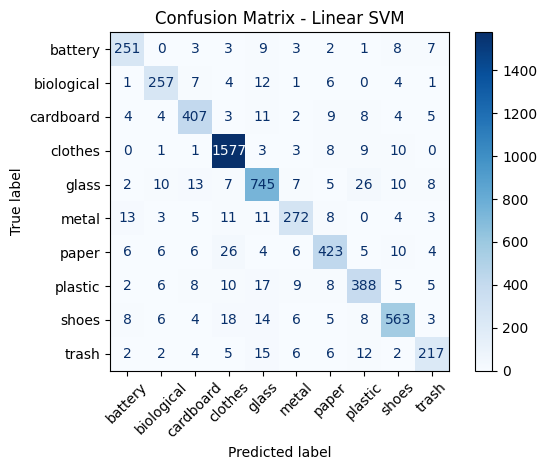


RBF SVM Test Accuracy: 0.90

Best Parameters for RBF SVM: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

Classification Report for RBF SVM:

              precision    recall  f1-score   support

     battery       0.87      0.87      0.87       287
  biological       0.87      0.88      0.87       293
   cardboard       0.89      0.89      0.89       457
     clothes       0.95      0.98      0.96      1612
       glass       0.89      0.89      0.89       833
       metal       0.86      0.82      0.84       330
       paper       0.88      0.85      0.87       496
     plastic       0.85      0.84      0.85       458
       shoes       0.91      0.89      0.90       635
       trash       0.85      0.80      0.82       271

    accuracy                           0.90      5672
   macro avg       0.88      0.87      0.88      5672
weighted avg       0.90      0.90      0.90      5672



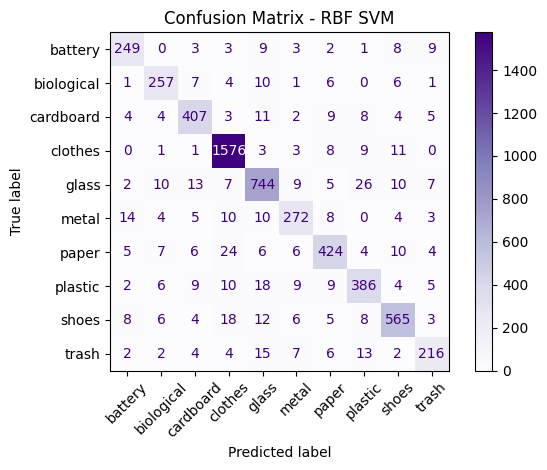

In [16]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def extract_cnn_features(model, loader):
    features_list = []
    labels_list = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            features = model.extract_features(images)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.cpu().numpy())

    X = np.vstack(features_list)   
    y = np.hstack(labels_list)    
    return X, y

model = ConvNet(num_classes).to(device) 
model.load_state_dict(torch.load("best_cnn_model.pth"))
model.eval() 

scalar = StandardScaler()

X_train, y_train = extract_cnn_features(model, train_loader)
X_test, y_test   = extract_cnn_features(model, test_loader)

target_classes = test_loader.dataset.dataset.classes

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

# linear SVM
params_linear = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search_linear = GridSearchCV(SVC(kernel='linear'), params_linear, cv=5, scoring='accuracy')
grid_search_linear.fit(X_train_scaled, y_train)

best_linear_svm = grid_search_linear.best_estimator_

y_pred_linear = best_linear_svm.predict(X_test_scaled)
linear_acc = accuracy_score(y_test, y_pred_linear)
print(f"\nLinear SVM Test Accuracy: {linear_acc:.2f}")
print("\nBest Parameters for Linear SVM:", grid_search_linear.best_params_)
print("\nClassification Report for Linear SVM:\n")
print(classification_report(y_test, y_pred_linear, target_names=target_classes))

cm_linear = confusion_matrix(y_test, y_pred_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=target_classes)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix - Linear SVM")
plt.tight_layout()
plt.show()

# non-linear SVM (RBF)
params_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_search_rbf = GridSearchCV(SVC(), params_rbf, cv=5, scoring='accuracy')
grid_search_rbf.fit(X_train_scaled, y_train)

best_rbf_svm = grid_search_rbf.best_estimator_
y_pred_rbf = best_rbf_svm.predict(X_test_scaled)

rbf_acc = accuracy_score(y_test, y_pred_rbf)
print(f"\nRBF SVM Test Accuracy: {rbf_acc:.2f}")
print("\nBest Parameters for RBF SVM:", grid_search_rbf.best_params_)
print("\nClassification Report for RBF SVM:\n")
print(classification_report(y_test, y_pred_rbf, target_names=target_classes))

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=target_classes)
disp.plot(xticks_rotation=45, cmap='Purples')
plt.title("Confusion Matrix - RBF SVM")
plt.tight_layout()
plt.show()
